In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The Curious Population Trends in Former Soviet States
### (Is there a correlation between religion and the fertility rates?)

## Abstract

Even though the global population is still increasing, the overall fertility rate of the world is getting lower every year. Almost all states are either below the replacement level or are moving in that direction. However, there are a handful of countries that at first glance do not seem to be following this general pattern. In this article, we will be investigating whether the post-Soviet states have an advantage in returning to and maintaining higher fertility levels and to what extent religion may play a part in that process.

## Introduction

Let us first provide some context. In 1991, a series of events led to the dissolution of the USSR. As a result, thirteen states (fourteen, if one includes Moldova) were able to claim their independance. For the purposes of this paper, we will divide these countries into four groups, based on their geographical location and predominant population, as listed below:

**Baltic**: Estonia, Latvia, Lithuania

**Northeast Europe**: Belarus, Russia, Ukraine

**Caucasian**: Armenia, Azerbaijan, Georgia

**Central Asia**: Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan, Uzbekistan

These distinctions will play when looking at the fertility rates of each country. They may also be important later on, when checking how big of a factor religion is in that regard. 

#### Total Fertility Rates
Each state had its own unique fertility rate, although the regions in which they were located would often share similar tendencies *(fig 1-4)*.

In [351]:
def create_tfr_plot(ax, table, coordinates, x_col, y_col, col_cond, id_list, title, color_list, legend_list):
    legend_list.append('TFRr')
    year_values = np.array(table[x_col].unique())
    for i in range(len(id_list)):
        ax[coordinates[0], coordinates[1]].plot(year_values, table.loc[population_tfr_table[col_cond] == id_list[i], y_col].values, color=color_list[i])
    
    ax[coordinates[0], coordinates[1]].plot(year_values, [2.1 for _ in range(len(year_values))], color='black', linestyle='dotted')
    ax[coordinates[0], coordinates[1]].set_title(title)
    ax[coordinates[0], coordinates[1]].set_xlabel('Year')
    ax[coordinates[0], coordinates[1]].set_ylabel('Total Fertility Rate')
    ax[coordinates[0], coordinates[1]].set_yticks(np.arange(1.0, 7.5, 0.5))
    ax[coordinates[0], coordinates[1]].grid()
    ax[coordinates[0], coordinates[1]].legend(legend_list, loc='upper right')

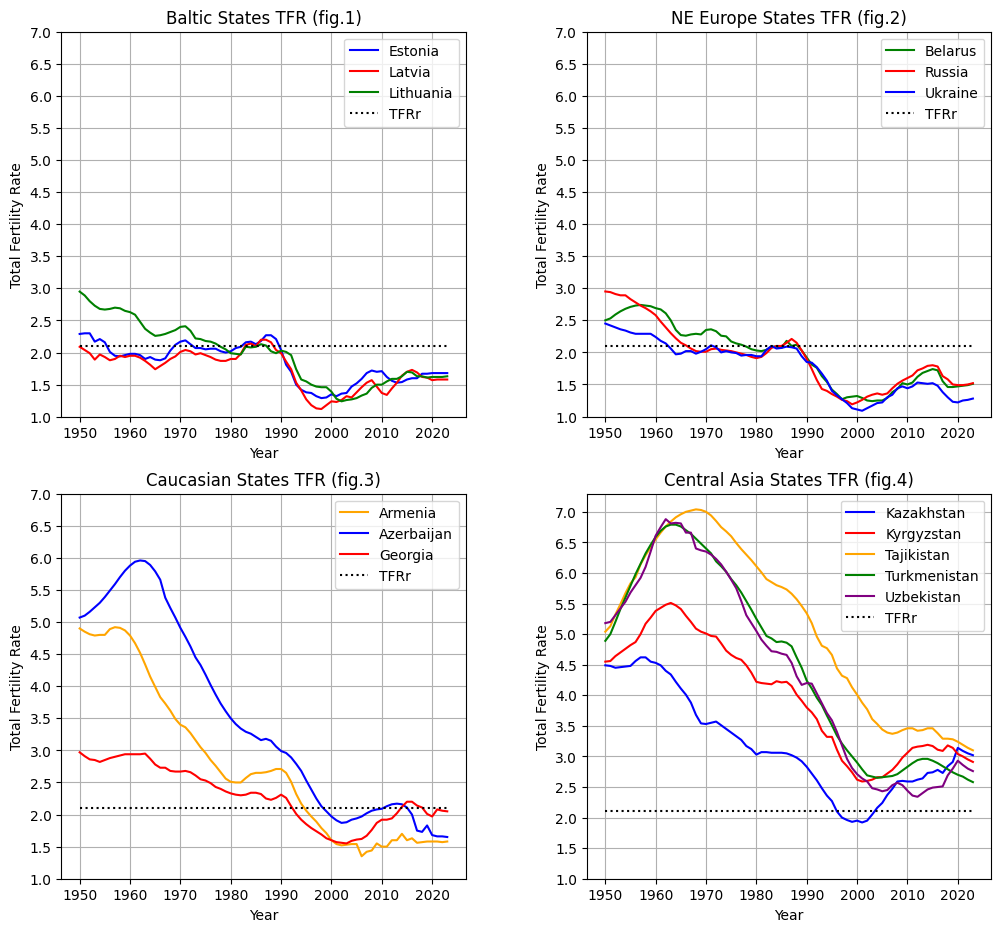

In [352]:
countries_table = pd.read_csv('sql-database/countries_table.csv')
population_tfr_table = pd.read_csv('sql-database/population_tfr_table.csv')

f, ax = plt.subplots(2, 2)
create_tfr_plot(ax, population_tfr_table, [0, 0], 'YearId', 'TFR', 'CountryId', [4, 8, 9], 'Baltic States TFR (fig.1)', 
                ['blue', 'red', 'green',], ['Estonia', 'Latvia', 'Lithuania'])
create_tfr_plot(ax, population_tfr_table, [0, 1], 'YearId', 'TFR', 'CountryId', [3, 10, 13], 'NE Europe States TFR (fig.2)', 
                ['green', 'red', 'blue'], ['Belarus', 'Russia', 'Ukraine'])
create_tfr_plot(ax, population_tfr_table, [1, 0], 'YearId', 'TFR', 'CountryId', [1, 2, 5], 'Caucasian States TFR (fig.3)', 
                ['orange', 'blue', 'red'], ['Armenia', 'Azerbaijan', 'Georgia'])
create_tfr_plot(ax, population_tfr_table, [1, 1], 'YearId', 'TFR', 'CountryId', [6, 7, 11, 12, 14], 'Central Asia States TFR (fig.4)', 
                ['blue', 'red', 'orange', 'green', 'purple'], ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'])

f.subplots_adjust(wspace=0.3, hspace=0.2)
f.set_figwidth(12)
f.set_figheight(11)
plt.show()


Northeast Europe and Baltic states seemed to experience a local maximum a few years before the end of the Soviet Union somewhere around the replacement level of 2.1 children per woman. After that, their TFR (total fertility rate) fell drastically during the 1990's and has since been fluctuating between 1.2 and 1.7. This is a pattern found often across other European countries.

In the Caucasian region, while the birth rates had been falling significantly overall since the 1960's, there was also a steep decrease between 1991 and the early 2000's. Since then, Armenia has remained varying around 1.5 children per woman, but Azerbaijan and Georgia were able to rise back above the replacement level. Only Georgia however has managed to stabilize somewhat around that number, while Azerbaijan suddenly experienced a steep decline around 2016 and has since fallen to similar levels as Armenia.

The Central Asia region is arguably the most unique out of the four. At first, its states followed a similar trend as those in the Caucases - most of them experiencing peaks in the TFR sometime in 1960's and then starting to decline, all before experiencing a steep decrease around the time of the USSR's dissolution. Kazakhstan was the first to recover on paper and has since returned its TFR to levels unseen since the 1980's, going from 1.92 in 2001 to 3.14 in 2020. Uzbekistan, although having experienced a second local minimum of 2.34 in 2012 returned to 2.93 in 2020. Kyrgyzstan reached a TFR of 3.19 in 2014 and 3.18 in 2018, after falling to its lowest on record of 2.59 in 2001. Despite this, each of these three states has had a declining TFR for the last four years. A possible reason for this may be the global impact of the COVID-19 pandemic.

#### Local Minimum/Maximum Disparity

To garner a better understanding of the TFR graphs, we will first need to measure the most significant changes for each country. We can notice that after 1991, every nation experiences a decrease in fertility rates, resulting in a local minimim, followed by an increase to a local maximum. To make our measurement, we will take each of these highest and lowest points and calculate the difference between them, as well as the time it took for the country to create that difference. Judging by the graphs, no country had a local minimum after 2013 or a local maximum before 2007, so those will be our "border points", when looking for these low and high points.

In [353]:
tfr_disparities = []
disparity_periods = []
min_border_interval = 64
max_border_interval = 58
countries = countries_table['Name'].tolist()

In [354]:
for i in range(0, 14):
    start_point = i * 74
    end_point = start_point + 74
    min_border_point = start_point + min_border_interval
    max_border_point = start_point + max_border_interval
    loc_minimum = population_tfr_table['TFR'][start_point:min_border_point].min()
    loc_min_year = population_tfr_table['TFR'][start_point:min_border_point].idxmin()
    loc_maximum = population_tfr_table['TFR'][max_border_point:end_point].max()
    loc_max_year = population_tfr_table['TFR'][max_border_point:end_point].idxmax()
    disparity_tfr = loc_maximum - loc_minimum
    disparity_period = loc_max_year - loc_min_year
    tfr_disparities.append(round(disparity_tfr, 2))
    disparity_periods.append(disparity_period)

disparity_table = pd.DataFrame()
disparity_table['country'] = countries
disparity_table['tfr_disparity'] = tfr_disparities
disparity_table['period'] = disparity_periods
disparity_table

,country,tfr_disparity,period
0,Armenia,0.35,8
1,Azerbaijan,0.30,11
2,Belarus,0.50,12
3,Estonia,0.43,10
4,Georgia,0.65,12
5,Kazakhstan,1.22,19
6,Kyrgyzstan,0.60,13
7,Latvia,0.61,18
8,Lithuania,0.46,13
9,Russia,0.61,16


To get a better feel for how these countries compare to one another, let's visualize them in a scatter plot.

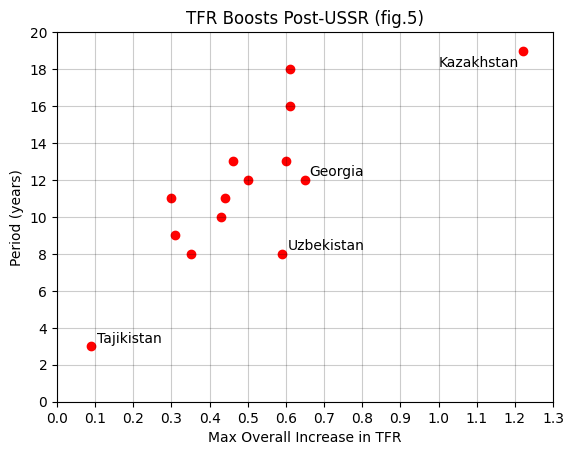

In [355]:
plt.scatter(disparity_table.tfr_disparity, disparity_table.period, color='r')
plt.title('TFR Boosts Post-USSR (fig.5)')
plt.xlabel('Max Overall Increase in TFR')
plt.ylabel('Period (years)')
plt.xticks(np.arange(0.0, 1.4, 0.1))
plt.yticks(np.arange(0, 22, 2))
plt.annotate('Tajikistan', xy=(0.105, 3.2))
plt.annotate('Georgia', xy=(0.66, 12.25))
plt.annotate('Kazakhstan', xy=(1, 18.1))
plt.annotate('Uzbekistan', xy=(0.605, 8.22))
plt.grid(linestyle='-', color='black', alpha=0.2)
plt.show()

We can see from the different boosts in TFR after the collapse of the Soviet Union *(fig.5)* that Kazakhstan is by far the most impressive with a disparity of 1.22. Georgia and Uzbekistan are also noticable, as the first achieves the second biggest disparity in much less time, while the latter experienced one of the fastest increases and still made it to the top half of the list. Most other nations either experienced slower or smaller increases in fertility rates. Tajikistan is by both metrics the least impressive, as its growth period was only three years and the TFR increase was by less than 0.1. However, it should be noted that Tajikistan currently still has the highest fertility rate of all these states, making its lack of major improvement somewhat less significant. 

All this data so far simply demonstrates that a collection of countries that were once a part of the Soviet Union (most of which are in Central Asia) have been able to secure higher fertility rates above or around the replacement level after drastic falls, following their independence. The question is, what factors can be attributed to this?

### Economy of Post-Soviet Countries

For a bit of background, the former soviet nations initially entered a period of economic turmoil throughout the 1990's, although they have overall seen growths in their economies since the start of the new millenium. There were certain crises such as those occurring around 2008, 2014 and 2020 took their toll to different extents. GDP per capita went up in all states, although many of them peaked at some point in the early-mid 2010's and have not recovered fully since, as we can see from the image below *(img. 1)*, taken from Marec Debrowski's paper "Thirty years of economic transition in the former Soviet Union: Macroeconomic dimension". 

##### GDP Per Capita in Post Soviet States *(img. 1)*

<img src="GDP Per Capita Post Soviet States.jpg" width="500" height="340">

Interestingly enough, Georgia is the country to experience the most consistent growth in GDP per capita throughout that decade, while Azerbaijan saw the biggest drop out of all of them. This correlates with what we see in the fertility rates of this time period *(fig.3)*. Nevertheless, a fall in GDP per capita does not guarantee a fall in TFR. Kazakhstan too saw a decline in that regard, but its fertility rates continued growing until the end of the decade. Also, Uzbekistan's inconsistent growth in its GDP per capita in the 2010's does not align clearly with its TFR rise for that decade.

### Kazakhstan - the Main Outlier

Kazakhstan appears to be by far the most eccentric case for a country. There is no example (based on U.N. data since 1950) of a country falling below the replacement level and then returning so far above that number and staying there. Others have noticed this unique trend of the country's. In his 2023 article "Sustained and Universal Fertility Recuperation in Kazakhstan", Maxim Kan outlines what the local population has been experiencing. He focuses on the role of the economy and education in the demographic changes. His research shows that in addition to there being a correlation between economic growth and fertility rate increases, there were no changes in the progression to parenthood and births that followed among women, regardless of their education. While the fertility rate data he uses differs slightly to that of the United Nations' (the minimum TFR for the country, according to his research, was 1.80 in 1999), it becomes clear that rising prosperity in Kazakhstan had, if anything, a positive affect on birth rates. This is not typically the case, as can be observed in practically all developed nations. In Kazakhstan's situation, economic growth helped women to have more children on average, something that had become a hinderance during the 1990's.

Even then, Kazakhstan's increase in TFR is arguably astonishing, expecially considering it has now briefly surpassed the fertility rates it had been enduring in the 1980's. We might expect something other than economics and education to play a role in this equation. One suggestion was posed at the end of Kan's paper, which said that further research into the role of religion in the country's TFR increase could be undertaken, given how cultural norms can influence a population's life choices. This we shall now do.

### Religion and Fertility

It is well-documented that declines in religious affiliation generally correlate with declines in TFr. Philip Jenkins, in his book "Fertility and Faith", actually adopts the perspective that nations become less religious as the result of lower birth rates, rather than the other way around. However, he does point out that there is a big difference in the way religion is calculated across cultures. Henceforth, the question that arises from this is how religiosity can be measured. In their paper "Measuring Five Dimensions of Religiosity across Adolescence", Lisa Pierce, George Hayward and Religious and Jessica Pearlman describe how one may do this. The dimensions discussed include "religious beliefs", "religious exclusivity", "external practice", "personal practice", and "religious salience". The last one is the dimension we will be focusing on for the rest of this article, as it fundamentally involves asking people how important they consider religion to be in their lives.

We are now ready to form our hypotheses. Whether religion impacts fertility rates or the other way around, what we will be focusing on is correlation.

## Hypotheses

Based on all of these findings, the following three hypotheses have been drawn out:
 1) Countries with **higher total fertility rates** will have **higher levels of religiosity**
 2) **Kazakhstan** will have had the **biggest increase in religiosity** out of all former Soviet nations
 3) **Georgia** will be the **most religious state outside of Central Asia**

## Calculations

### Starting Point (Religious Denominations)

Firstly, let's see what data we have at our disposal for religion as a whole in these areas. The Association of Religion Data Archives (ARDA) presents us with data on the proportion of religious groups in each country. Unfortunately, this information is presented only for 1970, 2000 and 2020, leaving us with many blind spots. Nonetheless, it may be a useful point of reference for how religious groups have changed since the states gained their independence.

In [356]:
rel_arda_table = pd.read_csv('sql-database/religiosity_arda_table.csv')

In [357]:
def plot_religiosity_arda(ax, table, coordinates, x_col, col_cond, country_id, title):
    yrs = religiosity_arda_table[x_col].unique()
    ax[coordinates[0], coordinates[1]].plot(yrs, table.loc[table[col_cond] == country_id, 'Christianity'], color='r', marker="o")
    ax[coordinates[0], coordinates[1]].plot(yrs, table.loc[table[col_cond] == country_id, 'Islam'], color='g', marker="o")
    ax[coordinates[0], coordinates[1]].plot(yrs, table.loc[table[col_cond] == country_id, 'Nonreligious'], color='black', marker="o")
    ax[coordinates[0], coordinates[1]].set_title(title)
    ax[coordinates[0], coordinates[1]].set_xlabel('Year')
    ax[coordinates[0], coordinates[1]].set_ylabel('Percentage (%)')
    ax[coordinates[0], coordinates[1]].set_yticks(np.arange(0, 101, 20))
    ax[coordinates[0], coordinates[1]].grid()

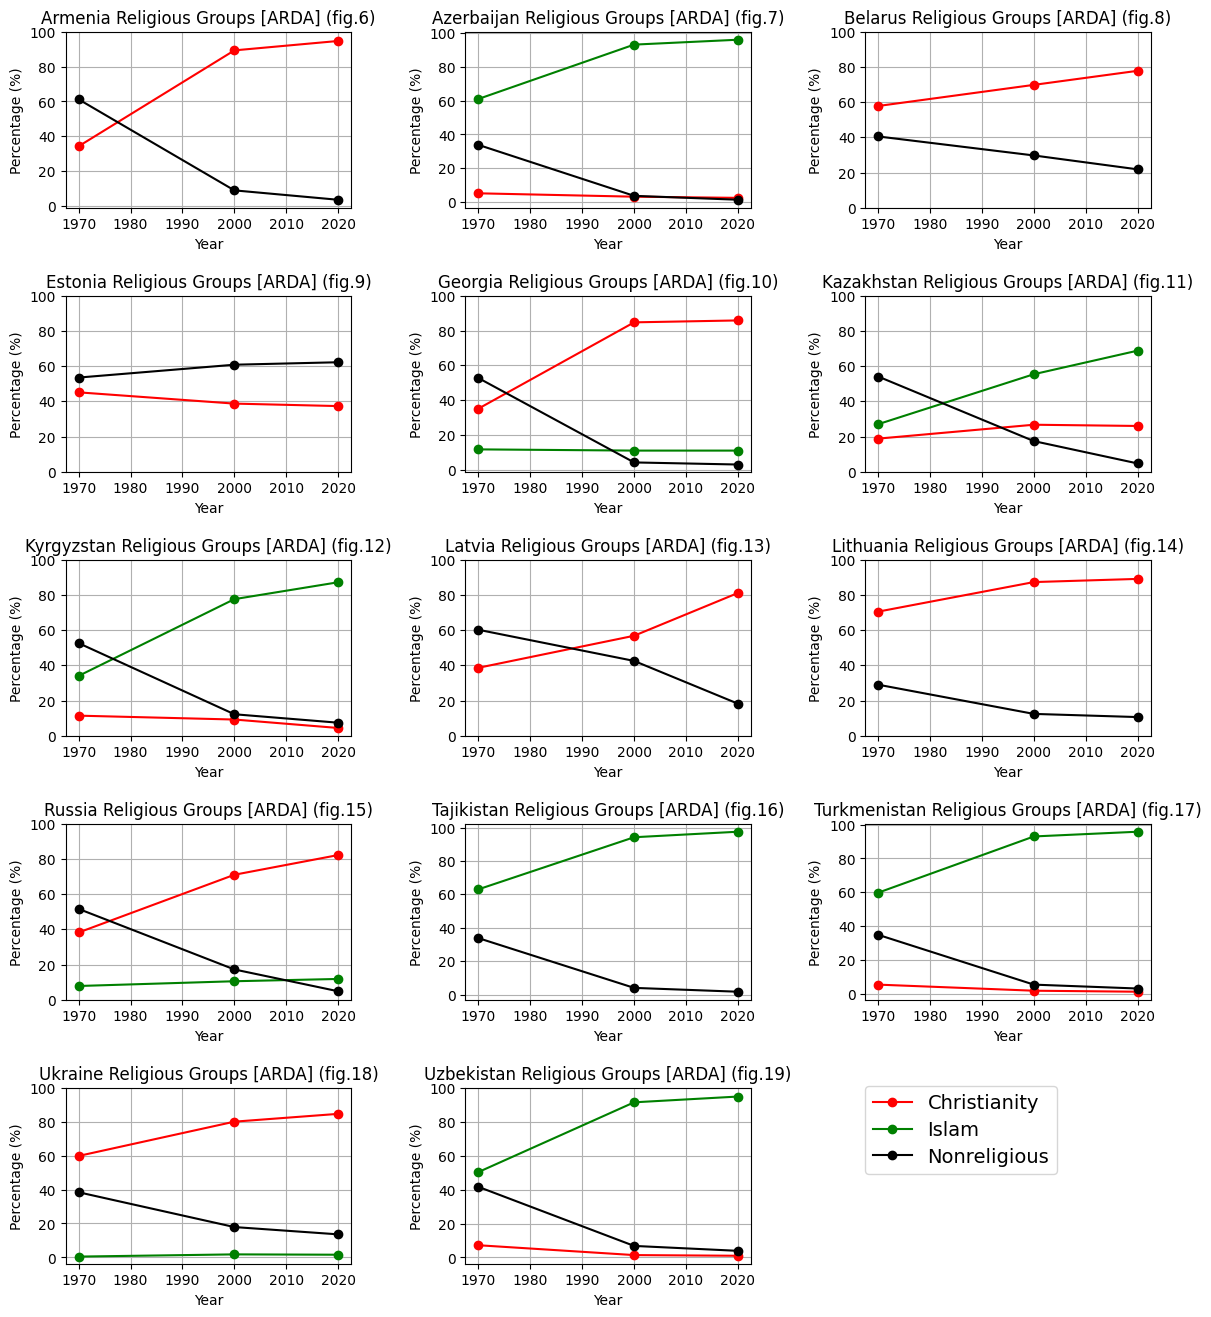

In [358]:
f, ax = plt.subplots(5, 3)

plot_religiosity_arda(ax, rel_arda_table, [0, 0], 'YearId', 'CountryId', 1, 'Armenia Religious Groups [ARDA] (fig.6)')
plot_religiosity_arda(ax, rel_arda_table, [0, 1], 'YearId', 'CountryId', 2, 'Azerbaijan Religious Groups [ARDA] (fig.7)')
plot_religiosity_arda(ax, rel_arda_table, [0, 2], 'YearId', 'CountryId', 3, 'Belarus Religious Groups [ARDA] (fig.8)')
plot_religiosity_arda(ax, rel_arda_table, [1, 0], 'YearId', 'CountryId', 4, 'Estonia Religious Groups [ARDA] (fig.9)')
plot_religiosity_arda(ax, rel_arda_table, [1, 1], 'YearId', 'CountryId', 5, 'Georgia Religious Groups [ARDA] (fig.10)')
plot_religiosity_arda(ax, rel_arda_table, [1, 2], 'YearId', 'CountryId', 6, 'Kazakhstan Religious Groups [ARDA] (fig.11)')
plot_religiosity_arda(ax, rel_arda_table, [2, 0], 'YearId', 'CountryId', 7, 'Kyrgyzstan Religious Groups [ARDA] (fig.12)')
plot_religiosity_arda(ax, rel_arda_table, [2, 1], 'YearId', 'CountryId', 8, 'Latvia Religious Groups [ARDA] (fig.13)')
plot_religiosity_arda(ax, rel_arda_table, [2, 2], 'YearId', 'CountryId', 9, 'Lithuania Religious Groups [ARDA] (fig.14)')
plot_religiosity_arda(ax, rel_arda_table, [3, 0], 'YearId', 'CountryId', 10, 'Russia Religious Groups [ARDA] (fig.15)')
plot_religiosity_arda(ax, rel_arda_table, [3, 1], 'YearId', 'CountryId', 11, 'Tajikistan Religious Groups [ARDA] (fig.16)')
plot_religiosity_arda(ax, rel_arda_table, [3, 2], 'YearId', 'CountryId', 12, 'Turkmenistan Religious Groups [ARDA] (fig.17)')
plot_religiosity_arda(ax, rel_arda_table, [4, 0], 'YearId', 'CountryId', 13, 'Ukraine Religious Groups [ARDA] (fig.18)')
plot_religiosity_arda(ax, rel_arda_table, [4, 1], 'YearId', 'CountryId', 14, 'Uzbekistan Religious Groups [ARDA] (fig.19)')

f.delaxes(ax[4][2])
plt.figlegend(['Christianity', 'Islam', 'Nonreligious'], loc="lower right", bbox_to_anchor=(0.84, 0.16), labelspacing=0.4, prop={'size': 14})
f.subplots_adjust(wspace=0.4, hspace=0.5)
f.set_figwidth(14)
f.set_figheight(16)
plt.show()


The first thing that becomes apparent is that each country experienced a surge in people proclaiming to belong to a religious denomination following their independence with Estonia being the only exception. Armenia seems to have made the biggest increase in its religious community, going from 34% Christian in 1970 to 94% Christian in 2020. At the same time, its TFR has seen an overwhelming decline to below the replacement level since the 1950's. All states in Northeast Europe and the Baltic region have long been below the replacement fertility rate too. What is important to remember however is that until around the year 2000, all countries were affected by economic issues. For instance, we may consider the possibility that in such times of turmoil, especially with greater religious freedoms at hand, people turned to their religious communities for support (this would need to be examined further and could be the topic of another research paper).

To begin measuring religiosity in terms of the importance of religion, we require information on how essential people consider their faith to be. Such a picture can be pieced together to some extent using data from the World Values Survey (WVS), which asks different people from different countries (at least 1000 citizens per country in each survey) across certain periods about what they merit in life and by how much. We will try and work out a formula for weighing in a country's religiosity for each survey year since 1995. Once again, it should be noted that there are many blind spots in this data, as some countries have been surveyed less often than others, not to mention at different times. Latvia and Lithuania for example have not been surveyed for over a quater of a century.

In [359]:
rel_wvs_table = pd.read_csv('sql-database/religiosity_wvs_table.csv')

### Determining levels of Religiosity

The WVS question we will be focusing on is, as they say in their questionaire, to "indicate how important it (religion) is in your life". The options given were as follows: "Very Important", "Rather Important", "Not Very Important", "Not Important", as well as "Don't Know" or "No Answer". For our purposes, we have rounded the "Don't Know" and "No Answer" responses down to one category, labeled "Undecided". A value will need to be assigned each of these answers.

As the "Undecided" category is not informative, we will consider that category to have no substantial value (0). Regarding the others, we will assume that there is on average an equal difference in the imoprtance of religion to people in each of those groups. In other words, the difference in importance to people who, for instance, answered "very important" and "rather important" is on average the same difference found between those who answered "rather important" and "not very important". We will also assign the first two answers with a positive value and the latter two with a negative value. Since our assumption is that the difference in the level of importance is on average identitical, the values will be as follows:
 * Very Important: **3**
 * Rather Important: **1**
 * Not Very Important: **-1**
 * Not Important: **-3**
 * Undecided: **0**

As a result we will get the following formula for producing a religiosity level (RL), based on this data:

$$ RL = \frac{3 (vi - ni) + ri - nvi} {300} $$

In [360]:
def cal_religiosity_level(vi, ri, nvi, ni):
    rl = (3 * (vi - ni) + ri - nvi) / 300
    rl = round(rl, 2)
    return rl

This will produce a number between -1 and 1, where -1 would mean that religion is of no importance to anyone in the country, while 1 would mean religion was very important to everyone in the country. With this method of measurement now established. 

We will now apply it to our available data.

### Calculating Religiosity Level

In [361]:
vi_list, ri_list = rel_wvs_table['Very Important'].tolist(), rel_wvs_table['Rather Important'].tolist()
nvi_list, ni_list = rel_wvs_table['Not Very Important'].tolist(), rel_wvs_table['Not Important'].tolist()
rel_level_list = [cal_religiosity_level(vi_list[i-1], ri_list[i-1], nvi_list[i-1], ni_list[i-1]) for i in rel_wvs_table['Id']]

rel_wvs_table['Religiosity Level'] = rel_level_list

In [362]:
merged_wvs_table = rel_wvs_table.copy()
wvs_tfr_values = []

for i in range(len(merged_wvs_table['Id'])):
    result = population_tfr_table.loc[(population_tfr_table['CountryId'] == merged_wvs_table['CountryId'][i]) & 
                                      (population_tfr_table['YearId'] == merged_wvs_table['YearId'][i]), 
                                      'TFR']
    result = str(result).split(' ')
    tfr = result[4][:-6]
    wvs_tfr_values.append(float(tfr))

merged_wvs_table['TFR'] = wvs_tfr_values

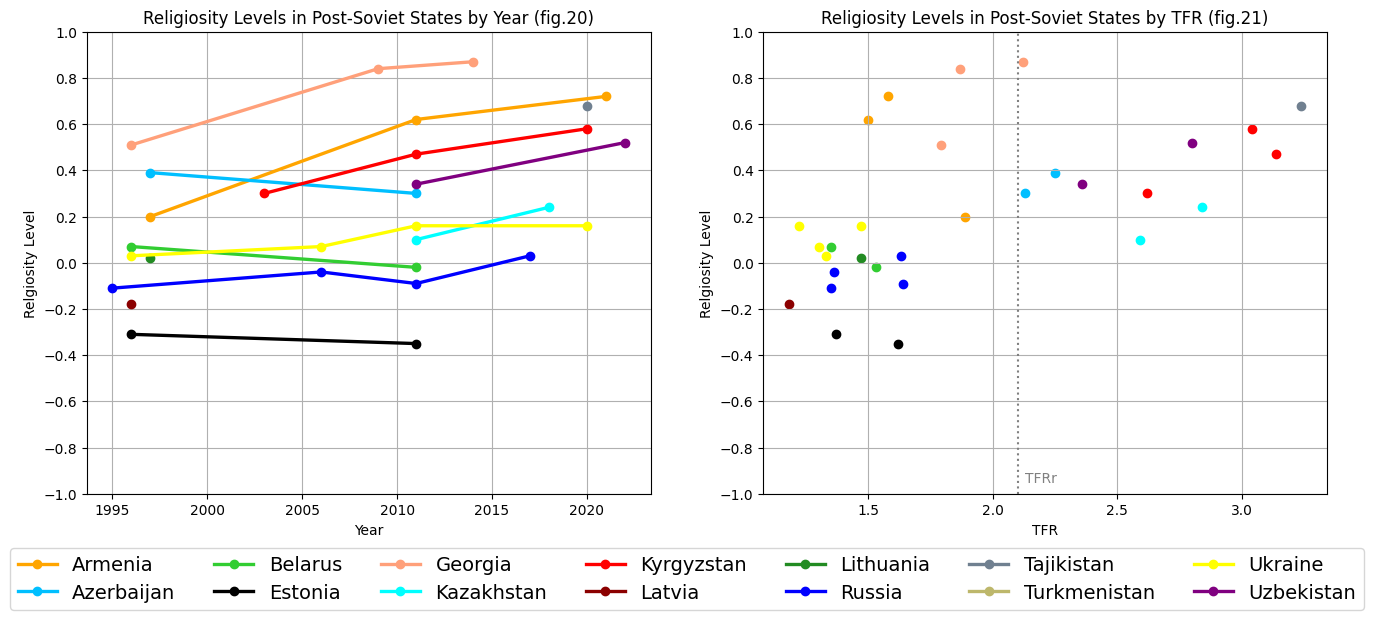

In [363]:
rl_color_list = ['orange', 'deepskyblue', 'limegreen', 'black', 'lightsalmon', 'cyan', 'red', 'darkred', 'forestgreen', 'blue', 'slategrey', 'darkkhaki', 'yellow', 'purple']
f, ax = plt.subplots(1, 2)

for i in range(1, 15):
    ax[0].plot(rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'YearId'], 
               rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'Religiosity Level'], 
               color=rl_color_list[i-1],
               linewidth=2.4,
               marker="o")

ax[0].set_title('Religiosity Levels in Post-Soviet States by Year (fig.20)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Relgiosity Level')
ax[0].set_yticks(np.arange(-1, 1.01, 0.2))
ax[0].grid()

for i in range(1, 15):
    ax[1].scatter(merged_wvs_table.loc[merged_wvs_table['CountryId'] == i, 'TFR'], 
                merged_wvs_table.loc[merged_wvs_table['CountryId'] == i, 'Religiosity Level'], 
                color=rl_color_list[i-1])

ax[1].set_title('Religiosity Levels in Post-Soviet States by TFR (fig.21)')
ax[1].set_xlabel('TFR')
ax[1].set_ylabel('Relgiosity Level')
ax[1].set_yticks(np.arange(-1, 1.01, 0.2))
ax[1].axvline(x=2.1, color='grey', linestyle='dotted')
ax[1].annotate('TFRr', xy=(2.13, -0.95), color='grey')
ax[1].grid()

f.subplots_adjust(wspace=0.2, hspace=0.2)
f.set_figwidth(16)
f.set_figheight(6)
plt.figlegend(countries, loc="lower center", bbox_to_anchor=(0.5, -0.1), labelspacing=0.45, prop={'size': 14}, ncol=7)
plt.show()


When taking a look at the results from the religiosity level calculation by year *(fig.20)* one can see that Georgia rated the highest out of all states with levels on 0.84 and 0.87 in 2009 and 2014 respectively. This would seem to be in alignment with hypothesis 3, though even the Central Asian countries have not recorded such rates. Because ten years have passed since the last survey however, we would require fresh data to compare it to more recent results elsewhere. As we presumed, Kazakhstan, Uzbekistan and Kyrgyzstan all saw their rates growing, but too few surveys were conducted to get any clear picture of their situations before the 2010's. Kazakhstan actually had the lowest rates of all the Central Asian countries when surveyed, in spite of seeing an increase from 0.10 to 0.24 between 2011 and 2018. 

If there was a robust connection between religiosity levels as we interpret them and fertility rates, we would expect countries further to the left of fig.21 to be positioned lower than those further on the the right. The results for Armenia and Georgia make this difficult to accept. Armenia's strong levels of religiosity still seem to correlate with lower fertility rates, making its situation a possible counter argument for hypothesis 1. Azerbaijan had a higher RL than Kazakhstan in all surveys, yet its TFR was always lower. However, as the time periods between each of their surveys do not correspond, this is not the fairest comparison. Meanwhile, northeast European countries saw somewhat fluctuating rates between -0.2 and 0.2. We have almost no data for the Baltic states after 1997, making them too unsuitable for analysis in this case.

### Religiosity Growth Rate per Year

Finally, to get a better understanding of how each state's religiosity level has been changing between their first and last surveys, we will calculate the growth rate per year for those, which we have at least two surveys for. As some states have 0 or 1 surveys conducted, they will be excluded from this calculation. The formula by which we will do this will include dividing the difference in the religiosity levels between two surveyed years by the time period that seperated them.

$$ GR_{RL} = \frac{RL_{2} - RL_{1}} {t_{2} - t_{1}} $$

In [364]:
def cal_rl_growth_rate(rl1, rl2, year1, year2):
    gr = (rl2 - rl1) / (year2 - year1)
    gr = round(gr, 3)
    return gr

In [365]:
gr_list = []
valid_country_id_list = []

for i in range(1, 15):
    if i not in rel_wvs_table['CountryId'].unique() or len(rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'Religiosity Level']) == 1:
        pass
    else:
        rl1 = rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'Religiosity Level'].iloc[0]
        rl2 = rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'Religiosity Level'].iloc[-1]
        year1 = rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'YearId'].iloc[0]
        year2 = rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'YearId'].iloc[-1]
        gr = cal_rl_growth_rate(rl1, rl2, year1, year2)
        gr_list.append(gr)
        valid_country_id_list.append(i)

In [366]:
latest_gr_table = pd.DataFrame()
latest_gr_table['CountryId'] = valid_country_id_list
latest_gr_table['Growth Rate Per Year'] = gr_list

In [367]:
countries_table.rename(columns={'Id': 'CountryId'}, inplace=True)
merged_gr_table = pd.merge(latest_gr_table, countries_table, on="CountryId")
sorted_merged_gr_table = merged_gr_table.sort_values(by=['Growth Rate Per Year'])

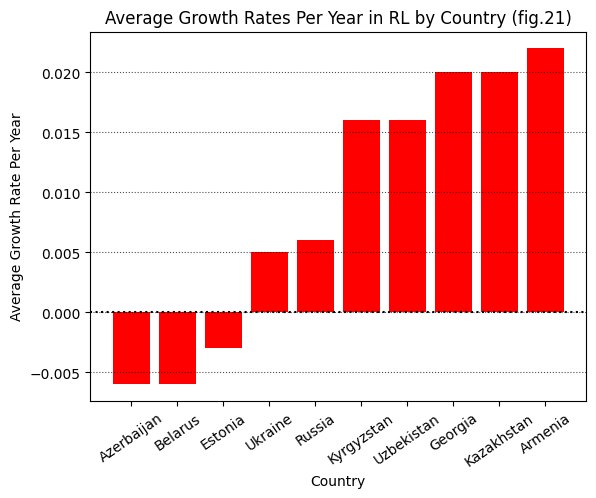

In [369]:
plt.bar(sorted_merged_gr_table['Name'], sorted_merged_gr_table['Growth Rate Per Year'], color='r')
plt.title('Average Growth Rates Per Year in RL by Country (fig.21)')
plt.xlabel('Country')
plt.ylabel('Average Growth Rate Per Year')
plt.xticks(rotation=35)
plt.axhline(y=0, color='black', linestyle='dotted')
plt.grid(axis='y', linestyle=':', color='black', alpha=0.7, zorder=0)
plt.show()


As the chart above *(fig.21)* suggests, Armenia has the largest average growth rate, followed by the Central Asian countries and Georgia. Kazakhstan has  Uzbekistan came in third place with 0.16, a rank we might have expected, given the boost it had in TFR within only 8 years *(fig.5)*

## Conclusions and Possible Future Research

When examining religiosity in terms of how important one considers religion to be in their lives and looking at World Value Survey data, we produced a metric named *religiosity level* (RL). This value ranges from -1 to 1, where -1 implies that religion is of no importance to surveyed population, while 1 implies religion is very important to everyone in that population.

Regarding hypothesis 1, we saw a mild correlation between religiosity levels and fertility rates, but no direct association in all cases. Central Asian states did overall register higher such levels, while in Baltic and north European countries (wherever there was data) they were significantly lower. Nonetheless, Armenia remains an important outlier, which stops us from drawing more certain conclusions. Georgia's latest RL was the highest on record for post-USSR nations than any Central Asian nation. This could sugggest that states in the Caucuses require much stronger religiosity levels, for religion to have the same effect.

Given what information we have, Kazakhstan came tied with Georgia for the second largest average growth rate in RL with Armenia coming out on top. This is unexpected, given the much lower TFR in the latter country. We may therefore accept that hypothesis 2 was not true, based on the data available. Since we do not know exactly what religiosity level Kazakhstan may have had before 2011 though, this result is somewhat inconclusive.

We can be more certain about Hypothesis 3, as Georgia had not only the highest RL outside Central Asia, but came out on top when compared to all other nations once part of the USSR. Reasons for this are currently unknown.

Further investigation into the topic is necessary to make more definite statements, particularly given the other factors at work that determine if a country's TFR will rise or fall. For example, the Nagorno-Karabakh conflict, affecting Armenia and Azerbaijan has been going on since Soviet times. This could be one reason why Armenia has been unable to return above replacement level and Azerbaijan has the lowest TFR out of all Muslim countries discussed. Also, Islam is the predominant religion in the Central Asian countries, while Christianity is most popular in almost all others. Perhaps Christian nations on average require stronger religiosity levels to see similar effects. In addition to that, these are not the only states to have recently experienced such trends. Algeria, for instance, went from having a fertility rate of 2.46 in 2001 to 3.05 in 2017, since which it has consistently declined to 2.77. One may want to check if similar factors and correlations can be found there as well.

## Margins of Error
 * The samples of subjects from each survey from the WVS varies between 1000 to 2500, often depending on the size of the country's population; bigger samples may present us with more accurate results.
 * The proportion of test subjects who answered "don't know" or "no answer" when asked to "indicate how important it (religion) is in your life" could  sometimes get as high as 8.7%; we cannot be sure we are discounting subjects who do not contribute to the religiosity level calculation
 * Surveys from the WVS are not conducted across equal intervals of time or sometimes at all in every country, leading us to assume each survey is representative of the period it was conducted in
 * The religiosity level equation assumes an average difference in importance practiced by subjects from each of the four categories; this cannot be proven to be the case.

## Bibliography 
1. 